## Code to visualize 
This script takes input files from a pre-processing step that performs a periodic boundary condition correction (in-house tool, 'lammpstools_pbc_fix') and converts coarse-grained trajectories into 'center-of-mass' (COM) trajectories (in-house tool, 'lammpstools_build_comtraj'). The resulting trajectory contains one bead per chain (called 'CM') located at the center of mass position of the original chain.

Generates Figure 3C.

In [9]:
## import packages ##

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [10]:
## load txt files containing list of Rgs ##
SERF_alone = np.loadtxt('Rg_data_files/SERF_only_Rgs.txt')
SERF_TAR = np.loadtxt('Rg_data_files/SERF+TAR_bound_Rgs.txt')
SERF_U30 = np.loadtxt('Rg_data_files/SERF+U30_bound_Rgs.txt')

In [11]:
## put them in a dataframe ##

Rg_data = {'SERF': SERF_alone, 'SERF-TAR': SERF_TAR, 'SERF-U30': SERF_U30}

Rg_df = pd.DataFrame.from_dict(Rg_data, orient = 'index').T

In [12]:
## compute rounded averages to display on plot ##

serf_avg = round(np.mean(SERF_alone), 1)
TAR_avg = round(np.mean(SERF_TAR), 1)
U30_avg = round(np.mean(SERF_U30), 1)

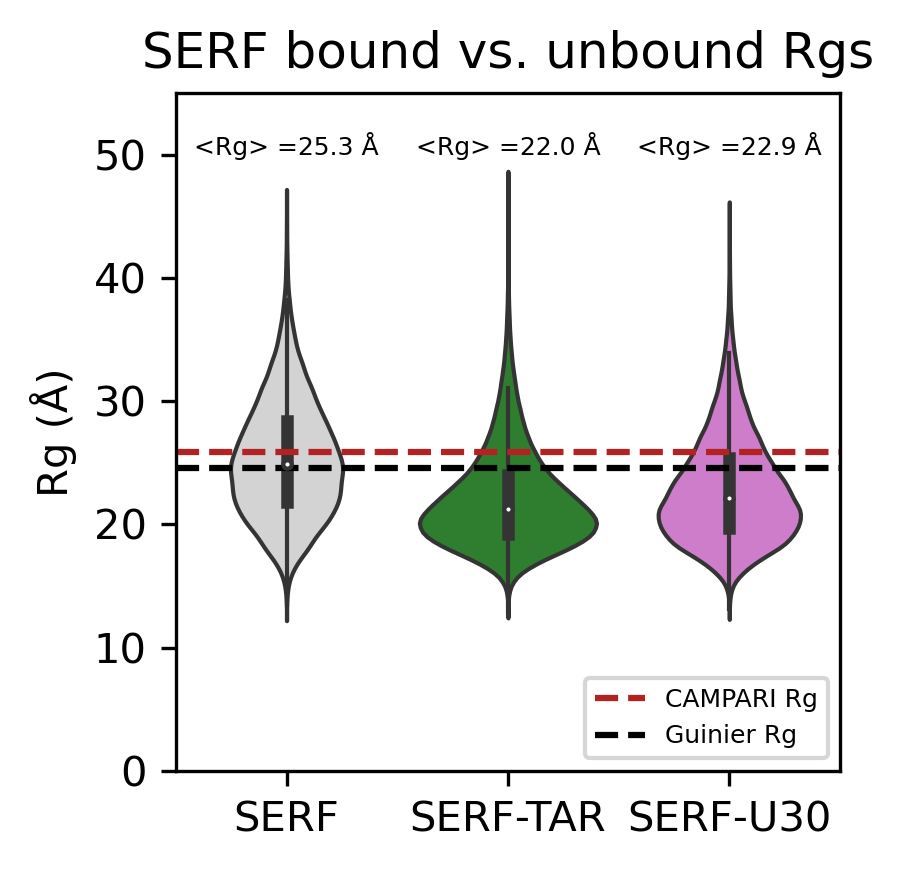

In [13]:
## plot violin distributions for each SERF, SERF+TAR, and SERF+U30 -- generates Figure 3C ##

plt.figure(num = None, figsize = (3, 3), dpi = 300, facecolor = 'w', edgecolor = 'k')

colors = {"SERF": "lightgrey", "SERF-TAR": "forestgreen", "SERF-U30": "orchid"}
sns.violinplot(data = Rg_df, linewidth = 1, palette = colors)

plt.title('SERF bound vs. unbound Rgs')
plt.ylabel('Rg (Å)')

# annotate Rgs from all-atom (CAMPARI) simulations and SAXS Guinier analysis
plt.axhline(y = 25.9, linestyle = '--', color = 'firebrick', label = 'CAMPARI Rg')
plt.axhline(y = 24.6, linestyle = '--', color = 'k', label = 'Guinier Rg')

plt.annotate('<Rg> =' +str(serf_avg)+ ' Å', xy = (0, 50), ha = 'center', fontsize = 6)
plt.annotate('<Rg> =' +str(TAR_avg)+ ' Å', xy = (1, 50), ha = 'center', fontsize = 6)
plt.annotate('<Rg> =' +str(U30_avg)+ ' Å', xy = (2, 50), ha = 'center', fontsize = 6)

plt.legend(loc = 'lower right', prop={'size': 6})

plt.ylim([0, 55])

plt.tight_layout()

## UNCOMMENT to save figure
plt.savefig('Figure3C_SERF_bound_Rgs.pdf', format = 'pdf', dpi = 300)
plt.show()

